In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
clean_df = pd.read_csv('clean_resume_data.csv')

In [3]:
clean_df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [4]:
clean_df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [5]:
#below visualizing the dataset

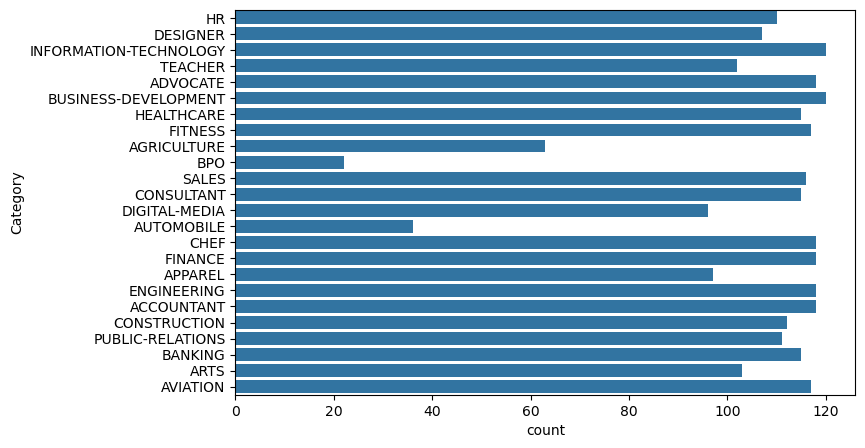

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(clean_df['Category'])
plt.show()

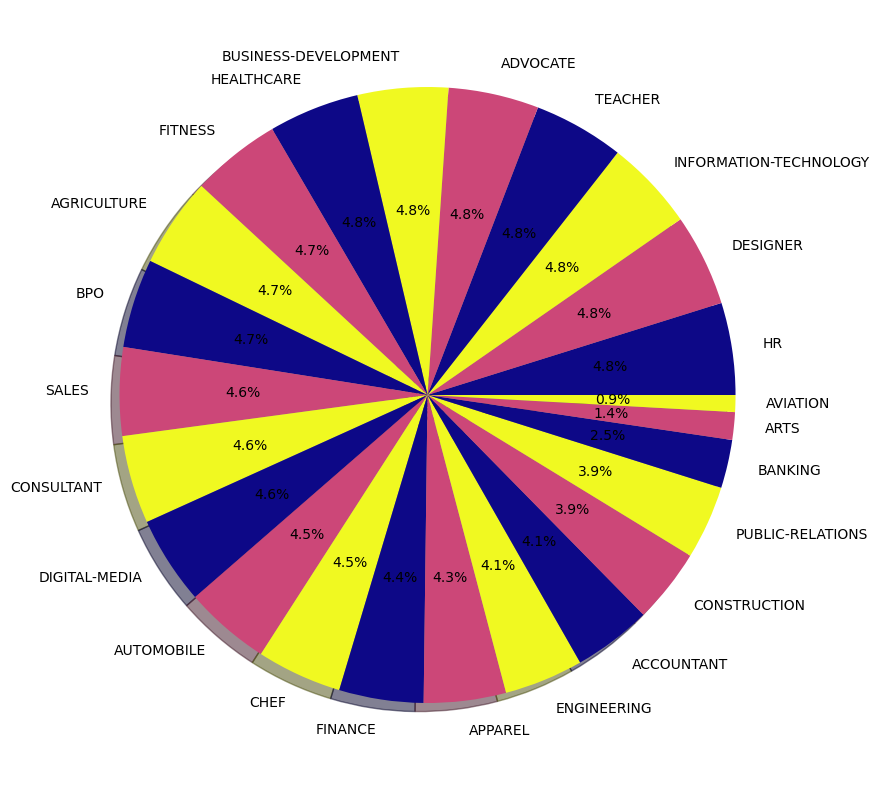

In [7]:
counts = clean_df['Category'].value_counts()
labels = clean_df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [8]:
#balancing the dataset

In [9]:
from sklearn.utils import resample

max_count = clean_df['Category'].value_counts().max() #defining max count

balanced_data = []
for category in clean_df['Category'].unique():
    category_data = clean_df[clean_df['Category'] == category]
    if len(category_data) < max_count:
        #oversampling cats with lower values
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        #undersampling cats with higher value count
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

# concatinating balanced cats
balanced_df = pd.concat(balanced_data)

In [10]:
balanced_df['Category'].value_counts()

Category
HR                        120
DESIGNER                  120
ARTS                      120
BANKING                   120
PUBLIC-RELATIONS          120
CONSTRUCTION              120
ACCOUNTANT                120
ENGINEERING               120
APPAREL                   120
FINANCE                   120
CHEF                      120
AUTOMOBILE                120
DIGITAL-MEDIA             120
CONSULTANT                120
SALES                     120
BPO                       120
AGRICULTURE               120
FITNESS                   120
HEALTHCARE                120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  120
TEACHER                   120
INFORMATION-TECHNOLOGY    120
AVIATION                  120
Name: count, dtype: int64

In [11]:
balanced_df.isnull().sum()

ID          0
Category    0
Feature     1
dtype: int64

In [12]:
balanced_df.dropna(inplace = True)

In [13]:
#test train split

In [14]:
X = balanced_df['Feature']
y = balanced_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train

228     director information technology professional p...
1557    senior finance manager summary highly driven f...
1194    consultant summary media planner media buyer r...
916     adult education teacher accomplishments cal po...
2150    banking summary high energy manager successful...
                              ...                        
1328    director executive profile forward thinker exp...
973     bpo team leader summary seeking provide top qu...
979     manager administration facilities executive su...
1027    pmc psm sales manager sales associate career f...
793     fitness specialist summary energetic personal ...
Name: Feature, Length: 2303, dtype: object

In [16]:
#tf idf encoding
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [17]:
#rf model used
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

#accuracy
y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334


In [18]:
print(classification_report(y_test,y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.80      0.95      0.87        21
              ADVOCATE       1.00      0.76      0.86        29
           AGRICULTURE       0.90      0.78      0.84        23
               APPAREL       0.94      0.81      0.87        21
                  ARTS       1.00      0.64      0.78        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.88      0.93      0.90        30
               BANKING       1.00      0.78      0.88        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.38      0.44      0.41        18
                  CHEF       0.82      0.96      0.89        28
          CONSTRUCTION       0.89      1.00      0.94        25
            CONSULTANT       0.95      0.68      0.79        31
              DESIGNER       0.96      0.86      0.91        28
         DIGITAL-MEDIA       0.83      

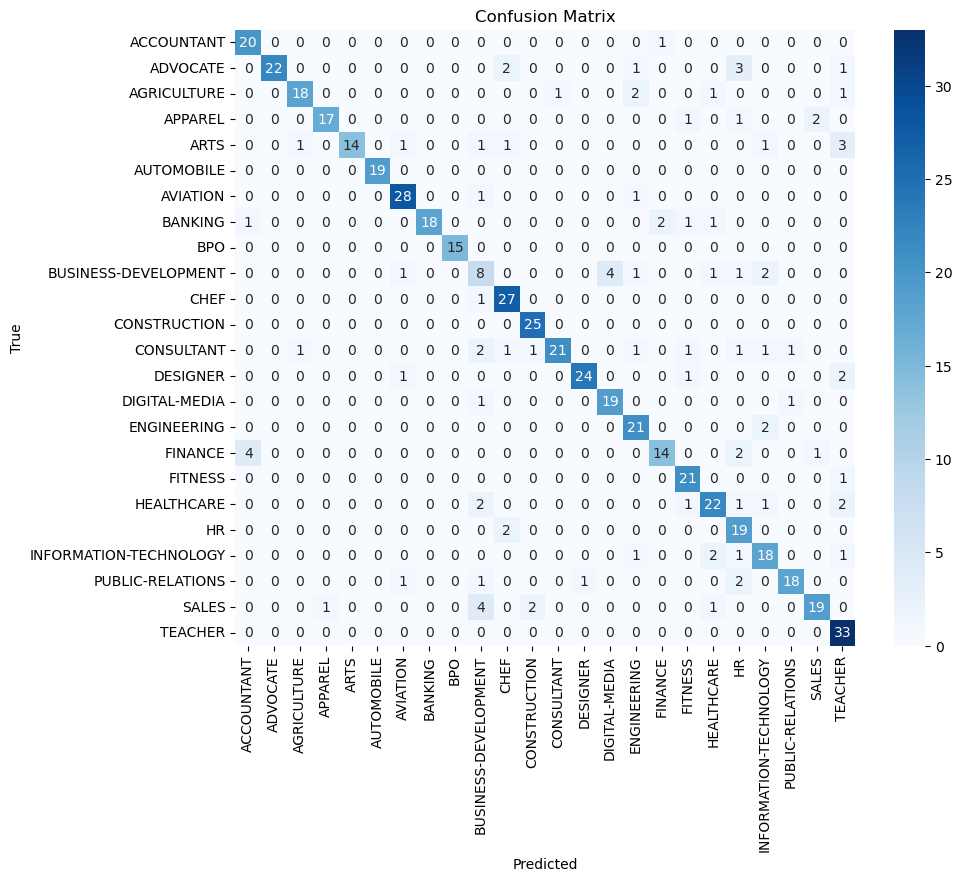

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
#resume cleaning
import re

def cleanResume(txt):
    cleanText = re.sub(r'http\S+\s', ' ', txt)  # links
    cleanText = re.sub(r'RT|cc', ' ', cleanText)
    cleanText = re.sub(r'#\S+\s', ' ', cleanText)  # special characters
    cleanText = re.sub(r'@\S+', ' ', cleanText)
    cleanText = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub(r'\s+', ' ', cleanText)
    return cleanText

In [21]:
def predict_category(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

In [23]:
#saving model
import pickle
pickle.dump(rf_classifier,open('models/rf_classifier_categorization.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('models/tfidf_vectorizer_categorization.pkl','wb'))